<h1 align=center><font size = 5><b>Automobiles price prediction project</b></font></h1>

<h2 align=center><font size = 5><b>Machine Learning part</font></h2>

<h3 align=center><font size = 3><b>A project by Boris Y. Nedyalkov</b></font></h3>
<h3 align=center><font size = 3>With data courtesy of https://www.kaggle.com/code/toramky/eda-for-automobile-dataset</font></h3>

<center> <img src="https://img.freepik.com/premium-vector/car-front-view-bundle-cars-different-configuration-styles-set-modern-automobiles-motor-vehicles-illustration_106796-433.jpg" width=500, height=500 /></center> 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data//clean_data.csv")

In [3]:
pd.set_option('display.max_columns', None)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.132075,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
189,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
190,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
191,-1,95.000000,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## ML

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [76]:
# One hot encoding the object features
object_column_names = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=object_column_names)

In [77]:
# Separate the labels from the data for modelling
y = df_encoded['price'].values

X_df = df_encoded.drop(['price'], axis=1)
X = X_df.values

In [78]:
# Here we don't have much data so we'll use cross-valudation down the line for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (169, 70) (169,)
Test set: (24, 70) (24,)


#### Default model

In [79]:
# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'model score on training data: {rf_model.score(X_train, y_train)}')
print(f'model score on testing data: {rf_model.score(X_test, y_test)}')

Mean Squared Error: 3012828.44
model score on training data: 0.9888406412690374
model score on testing data: 0.9186124802771795


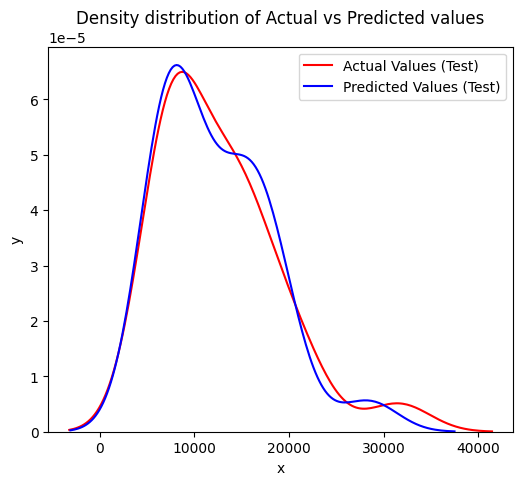

In [80]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()
    plt.close()

DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", "Density distribution of Actual vs Predicted values")

#### Hypertuning

In [86]:
from skopt import BayesSearchCV

param_space = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the Bayesian search
rf_bayesian = RandomForestRegressor(random_state=42)
bayesian_search = BayesSearchCV(
    rf_bayesian,
    param_space,
    n_iter=50,  # Number of iterations
    cv=4,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# to solve some internal skopt bugs from the change in numpy namings after v1.12.0
np.int = int

# Perform the Bayesian search
bayesian_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_bayesian = bayesian_search.best_params_
print(f'Best Hyperparameters (Bayesian): {best_params_bayesian}')

# Train the model with the best hyperparameters
rf_best_bayesian = RandomForestRegressor(random_state=42, **best_params_bayesian)
rf_best_bayesian.fit(X_train, y_train)
y_pred_best_bayesian = rf_best_bayesian.predict(X_test)

/home/smooth_penguin/anaconda3/envs/koalas/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/smooth_penguin/anaconda3/envs/koalas/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/smooth_penguin/anaconda3/envs/koalas/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/smooth_penguin/anaconda3/envs/koalas/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/smooth_penguin/anaconda3/envs/koalas/lib/python3.10/site-packages/skopt/optimizer/optimize

Best Hyperparameters (Bayesian): OrderedDict([('max_depth', 20), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 3), ('n_estimators', 50)])


In [87]:
# Feature importance
feature_importances = pd.DataFrame({'Feature': X_df.columns, 'Importance': rf_best_bayesian.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

             Feature  Importance
7        engine-size    0.175249
6        curb-weight    0.109125
13          city-mpg    0.105603
11        horsepower    0.080153
14       highway-mpg    0.075671
..               ...         ...
21        make_isuzu    0.000016
63  fuel-system_1bbl    0.000014
18    make_chevrolet    0.000008
25      make_mercury    0.000005
69  fuel-system_spfi    0.000000

[70 rows x 2 columns]


In [88]:
# Evaluation
final_mse = mean_squared_error(y_test, rf_best_bayesian.predict(X_test))
print(f'Final Mean Squared Error: {final_mse:.2f}')
print(f'Final model score on training data: {rf_best_bayesian.score(X_train, y_train)}')
print(f'Final model score on testing data: {rf_best_bayesian.score(X_test, y_test)}')

Final Mean Squared Error: 2685967.47
Final model score on training data: 0.9844718083319086
Final model score on testing data: 0.9274421909991566


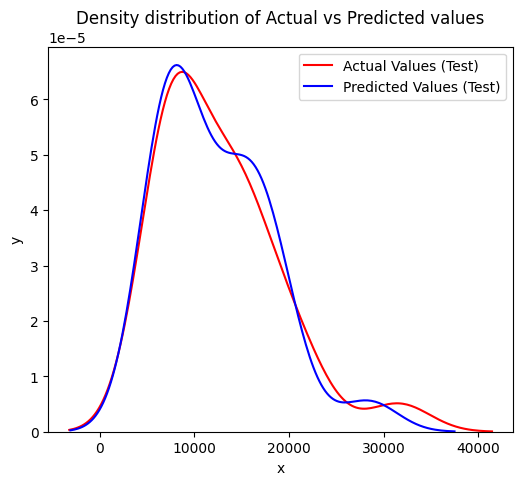

In [89]:
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", "Density distribution of Actual vs Predicted values")

In [102]:
import pickle

# Save the model to a file
with open('models//random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_best_bayesian, file)

#### Simple ML model for Streamlit

In [123]:
df_simple = df[['engine-size','curb-weight','city-mpg','horsepower','highway-mpg','price']]

In [124]:
# Separate the labels from the data for modelling
y = df_simple['price'].values

X_df = df_simple.drop(['price'], axis=1)
X = X_df.values

# Here we don't have much data so we'll use cross-valudation down the line for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (169, 5) (169,)
Test set: (24, 5) (24,)


In [125]:
# Train Random Forest model
rf_model_simple = RandomForestRegressor()
rf_model_simple.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model_simple.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse:.2f}')

print(f'model score on training data: {rf_model_simple.score(X_train, y_train)}')
print(f'model score on testing data: {rf_model_simple.score(X_test, y_test)}')

Mean Squared Error: 4154488.50
Root Mean Squared Error: 2038.26
model score on training data: 0.9873602718782775
model score on testing data: 0.8877720649743248


/home/smooth_penguin/anaconda3/envs/koalas/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [126]:
# Save the model to a file
with open('models//simple_random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model_simple, file)